# ImageNet veri seti ile Nesne Tanıma

### Gerekli Kütüphanelerin Kurulması :

In [1]:
import os
import numpy as np
from PIL import Image

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

2025-02-01 13:24:04.913962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738405444.976353   20810 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738405445.002404   20810 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-01 13:24:05.140123: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Kerasta önceden eğitilmiş bir modeli yükleme

In [2]:
model = VGG16(weights="imagenet", include_top=True)

I0000 00:00:1738405450.529772   20810 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6634 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1738405450.531550   20810 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6634 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:02:00.0, compute capability: 6.1


**Model yapısına bir göz atalım :** Hangi katmanlar var ve katmanların özellikleri neler?

In [3]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_layer': <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>,
 'block1_conv1': <KerasTensor shape=(None, 224, 224, 64), dtype=float32, sparse=False, name=keras_tensor_1>,
 'block1_conv2': <KerasTensor shape=(None, 224, 224, 64), dtype=float32, sparse=False, name=keras_tensor_2>,
 'block1_pool': <KerasTensor shape=(None, 112, 112, 64), dtype=float32, sparse=False, name=keras_tensor_3>,
 'block2_conv1': <KerasTensor shape=(None, 112, 112, 128), dtype=float32, sparse=False, name=keras_tensor_4>,
 'block2_conv2': <KerasTensor shape=(None, 112, 112, 128), dtype=float32, sparse=False, name=keras_tensor_5>,
 'block2_pool': <KerasTensor shape=(None, 56, 56, 128), dtype=float32, sparse=False, name=keras_tensor_6>,
 'block3_conv1': <KerasTensor shape=(None, 56, 56, 256), dtype=float32, sparse=False, name=keras_tensor_7>,
 'block3_conv2': <KerasTensor shape=(None, 56, 56, 256), dtype=float32, sparse=False, name=keras_tensor_8>,
 'block3_conv3': <KerasTen

**Toplam parametre sayısına bakalım**

In [4]:
print(f"Toplam Parametre sayısı : {model.count_params():,.0f}")

Toplam Parametre sayısı : 138,357,544


In [5]:
os.chdir("/home/dilaver/Keras_ile_Derin_Ogrenme/imagenet")

In [6]:
!ls

african_elephant.jpg  british_short_hair_cat.jpg  scotish_cat.jpg
asian_elephant.jpg    german_Shepard_dog.jpg	  siberian_wolf_dog.jpeg


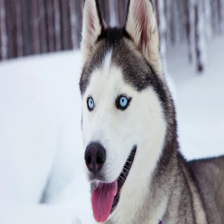

In [7]:
image_path = "siberian_wolf_dog.jpeg"
# Resmi Pillow ile açma
image = Image.open(image_path)

# Resmi yeniden boyutlandırma
image = image.resize((224, 224))

# Sonucu gösterme (isteğe bağlı)
image.show()

In [8]:
#Görüntüyü diziye çevirme
x = np.array(image, dtype="float32")
#Dizi listesine çevirme
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

## Görüntüyü Sınıflandırma

In [9]:
pred = model.predict(x)

I0000 00:00:1738405454.881496   20872 service.cc:148] XLA service 0x7f2f08004870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738405454.881689   20872 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
I0000 00:00:1738405454.881698   20872 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-02-01 13:24:14.919227: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738405455.021944   20872 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-01 13:24:15.532291: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[1,64,224,224]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,224,224]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1738405457.305774   20872 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [10]:
print("Tahmin :", decode_predictions(pred, top=3)[0])

Tahmin : [('n02109961', 'Eskimo_dog', np.float32(0.61091185)), ('n02110185', 'Siberian_husky', np.float32(0.37563676)), ('n02110063', 'malamute', np.float32(0.006762699))]


In [11]:
print("Tahmin :", decode_predictions(pred, top=1)[0][0][1])

Tahmin : Eskimo_dog
